# Summary Statistics

In descriptive statistics, summary statistics are used to summarize a set of observations, in order to communicate the largest amount of information as simply as possible.

* **Location** :
Common measures of location, or central tendency, are the 
    1. Arithmetic mean, 
    2. Median, 
    3. Mode, and 
    4. Interquartile mean.
* **Spread**:Common measures of statistical dispersion are the 
    1. Standard deviation, 
    2. Variance, 
    3. Range, 
    4. Interquartile range, 
    5. Absolute deviation, 
    6. Mean absolute difference and the distance standard deviation. 
    Measures that assess spread in comparison to the typical size of data values include the coefficient of variation.

    7. The Gini coefficient was originally developed to measure income inequality and is equivalent to one of the L-moments.

    8. A simple summary of a dataset is sometimes given by quoting particular order statistics as approximations to selected percentiles of a distribution.
* **Shape**
    1. Common measures of the shape of a distribution are skewness or kurtosis, while alternatives can be based on L-moments. 
    2. A different measure is the distance skewness, for which a value of zero implies central symmetry. 
* **Dependence**
    1. The common measure of dependence between paired random variables is the Pearson product-moment correlation coefficient, while a common alternative summary statistic is Spearman's rank correlation coefficient. 
    2. A value of zero for the distance correlation implies independence.

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# read dataset
df = pd.read_csv('../datasets/iris/iris.csv')

In [45]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [49]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


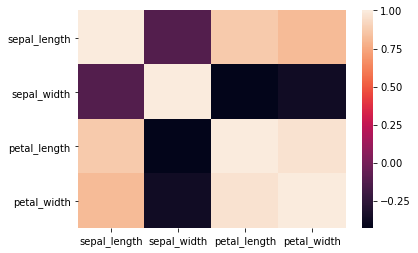

In [57]:
sns.heatmap(df.corr())

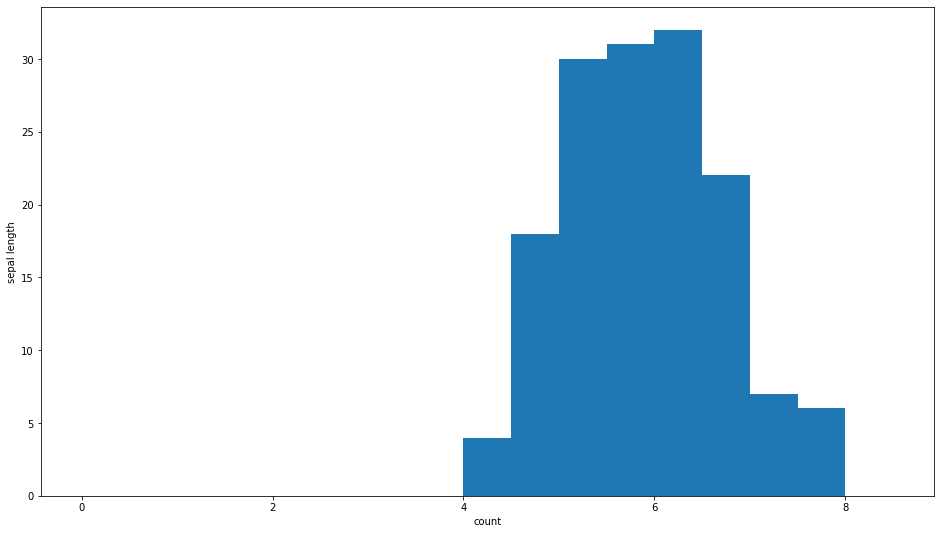

In [21]:
def histo():
    # create histogram
    bin_edges = np.arange(0, df['sepal_length'].max() + 1, 0.5)
    plt.figure(figsize=(16,9))
    fig = plt.hist(df['sepal_length'], bins=bin_edges)

    # add plot labels
    plt.xlabel('count')
    plt.ylabel('sepal length')
    
    
histo()

In [8]:
x = df['sepal_length'].values
x.dtype

dtype('float64')

### Sample Mean:

$$\bar{x} = \frac{1}{n}\sum_{i=1}^n = x_i$$

In [9]:
sum(i for i in x) / len(x)

5.843333333333335

In [10]:
x_mean = np.mean(x)
x_mean

5.843333333333334

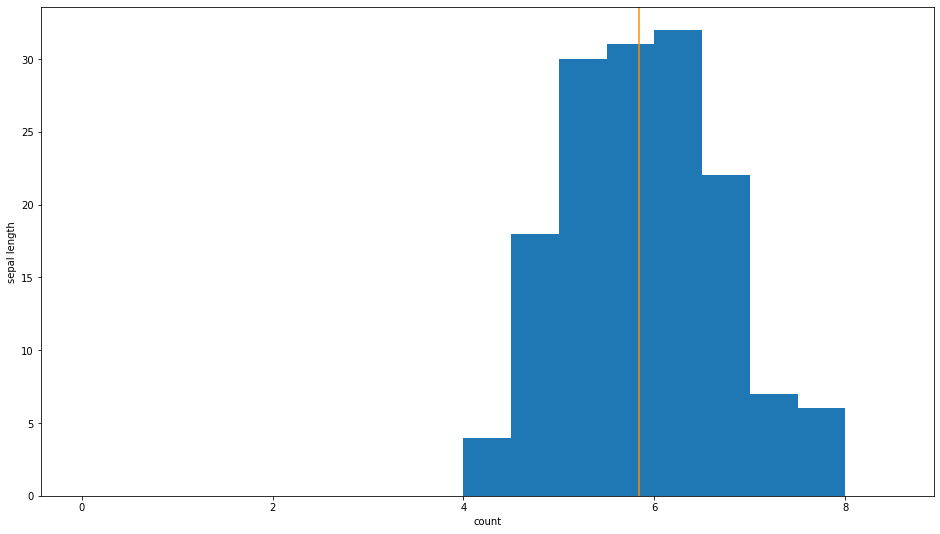

In [22]:
histo()
plt.axvline(x_mean, color='darkorange')
plt.show()

### Sample Variance:

$$Var_x = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$

- Bessel's correction to correct the bias of the population variance estimate
- Note the $unit$ of the variable is now $unit^2$

In [13]:
sum([(i - x_mean)**2 for i in x]) / (len(x) - 1)

0.6856935123042504

In [14]:
var = np.var(x, ddof=1)
var

0.6856935123042507

In [15]:
df['sepal_length'].var() # note that Bessel's correction is the default

0.6856935123042507

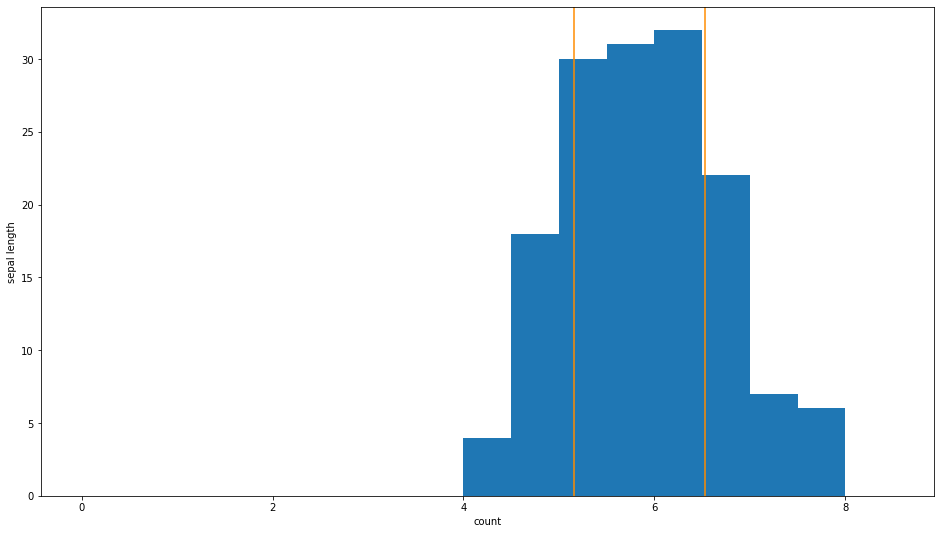

In [23]:
histo()
plt.axvline(x_mean + var, color='darkorange')
plt.axvline(x_mean - var, color='darkorange')
plt.show()

### Sample Standard Deviation:

$$Std_x = \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}}$$

In [24]:
(sum([(i - x_mean)**2 for i in x]) / (len(x) - 1))**0.5

0.8280661279778628

In [25]:
np.sqrt(np.var(x, ddof=1))

0.828066127977863

In [26]:
std = np.std(x, ddof=1)
std

0.828066127977863

In [27]:
df['sepal_length'].std() # note that Bessel's correction is the default

0.828066127977863

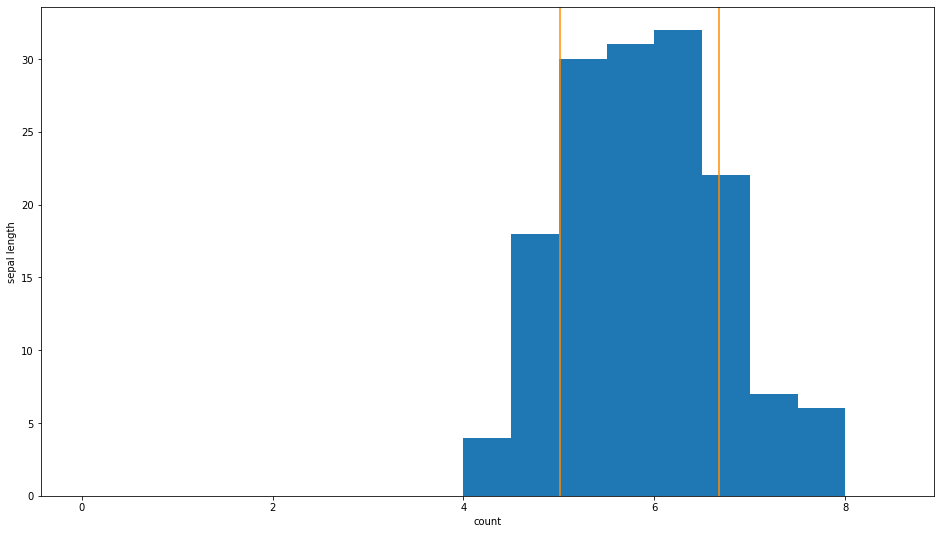

In [28]:
histo()
plt.axvline(x_mean + std, color='darkorange')
plt.axvline(x_mean - std, color='darkorange')
plt.show()

### Min/Max:

In [29]:
np.min(x)

4.3

In [30]:
np.max(x)

7.9

### Mode:

In [31]:
lst = list(x)
mode = max(set(lst), key=lst.count)
mode

5.0

In [32]:
lst.count(mode)

10

In [33]:
stats.mode(x)

ModeResult(mode=array([5.]), count=array([10]))

### 25th and 75th Percentile:

In [34]:
y = np.sort(x)
percentile_25th = y[round(0.25 * y.shape[0]) + 1]
percentile_25th

5.1

In [35]:
percentile_75th = y[round(0.75 * y.shape[0]) - 1]
percentile_75th

6.4

In [36]:
np.percentile(x, q=[25, 75], interpolation='lower')

array([5.1, 6.4])

In [37]:
df['sepal_length'].quantile(0.25, interpolation='lower')

5.1

In [38]:
df['sepal_length'].quantile(0.75, interpolation='lower')

6.4

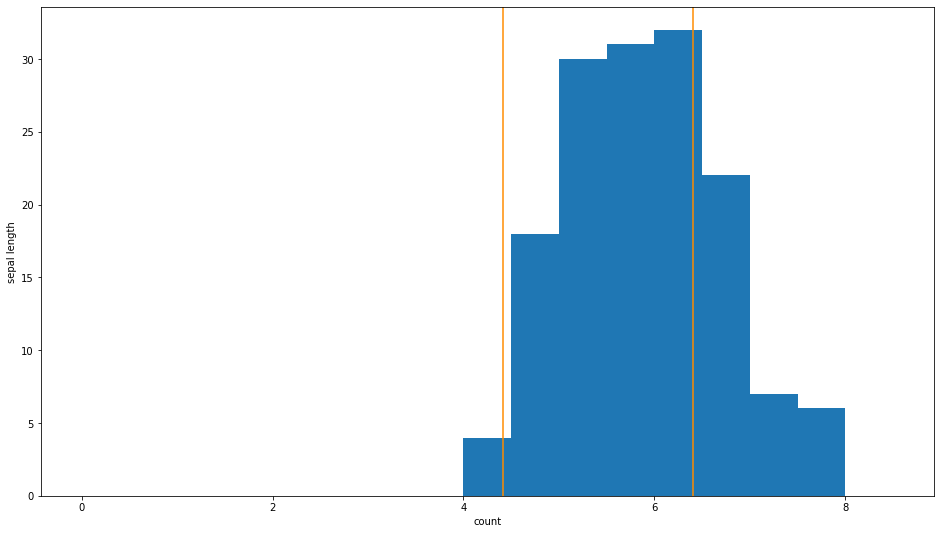

In [39]:
histo()
plt.axvline(percentile_75th, color='darkorange')
plt.axvline(percentile_25th - var, color='darkorange')
plt.show()

### Median (50th Percentile):

In [40]:
x = np.sort(x)

tmp = round(0.5 * x.shape[0])

if x.shape[0] % 2:
    median = x[tmp - 1]
else:
    median = x[tmp - 1] + (x[tmp] - x[tmp - 1]) / 2.
    
median

5.8

In [41]:
np.median(x)

5.8

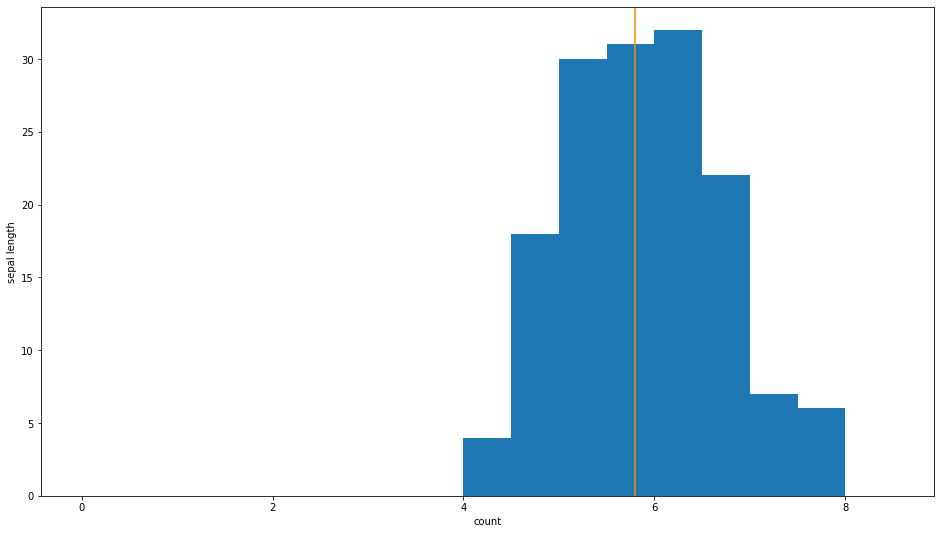

In [42]:
histo()
plt.axvline(median, color='darkorange')
plt.show()